In [564]:
# Job fraud detection from Kaggle dataset using Regression analysis and SHAP explanation
# Sibusiso Mathebula
# 08/01/2026




## Job Fraud Detection – Business Report
# Executive Summary

This analysis explores a job-posting dataset to identify patterns associated with fraudulent listings and to build an interpretable predictive model. The exploratory data analysis (EDA) surfaces clear concentration of fraud within specific job titles, locations, departments, salary ranges, operations, and qualification categories. A regression-based classification model, interpreted using SHAP values, provides transparency into which features most influence fraud predictions. Overall, the work demonstrates solid foundations, with clear opportunities to strengthen analytical rigor, business framing, and validation.

# Business Problem

Online job platforms face reputational damage and financial loss when fraudulent job postings are not detected early. The business objective is to:

Identify characteristics associated with fraudulent job postings, and

Develop an interpretable model that can help flag high-risk postings before they are published or promoted.

A successful solution should balance predictive performance, interpretability, actionability for trust & safety or compliance teams, and business cost

# Hypothesis

1. Job postings with shorter profile lengths are more likely to be fraudulent than those with longer profile lengths.

In [565]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns 





In [566]:
df = pd.read_csv('Job_Frauds.csv',encoding='latin1')

In [567]:
df.columns

Index(['Job Title', 'Job Location', 'Department', 'Range_of_Salary', 'Profile',
       'Job_Description', 'Requirements', 'Job_Benefits', 'Telecomunication',
       'Comnpany_Logo', 'Type_of_Employment', 'Experience', 'Qualification',
       'Type_of_Industry', 'Operations', 'Fraudulent'],
      dtype='object')

In [568]:
df.head(10)

,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Comnpany_Logo,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, theÂ Fonpit AGÂ rose with its...",Your Responsibilities:Â Manage the English-spe...,Your Know-How:Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â ...,Your Benefits:Â Being part of a fast-growing c...,0,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvyâs mission is to provide lucrative ye...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay.Â You'll be able to eat steak ...,0,1,NaN,NaN,NaN,NaN,NaN,0
8,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [569]:
df['Company_Logo']=df['Comnpany_Logo']
df.drop('Comnpany_Logo', axis=1 ,inplace=True)

In [570]:
df.dtypes


Job Title             object
Job Location          object
Department            object
Range_of_Salary       object
Profile               object
Job_Description       object
Requirements          object
Job_Benefits          object
Telecomunication       int64
Type_of_Employment    object
Experience            object
Qualification         object
Type_of_Industry      object
Operations            object
Fraudulent             int64
Company_Logo           int64
dtype: object

In [571]:
df.isnull().sum()

Job Title                 0
Job Location            346
Department            11547
Range_of_Salary       15012
Profile                3308
Job_Description           1
Requirements           2696
Job_Benefits           7212
Telecomunication          0
Type_of_Employment     3471
Experience             7050
Qualification          8105
Type_of_Industry       4903
Operations             6455
Fraudulent                0
Company_Logo              0
dtype: int64

In [572]:
df.drop_duplicates()

,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent,Company_Logo
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,Other,Internship,NaN,NaN,Marketing,0,1
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,1
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time youâve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,1
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,Full-time,NaN,NaN,NaN,NaN,0,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,Contract,Not Applicable,Professional,Graphic Design,Design,0,0


In [573]:
import pandas as pd

def unique_vs_missing_rate(df):
    """
    Returns a summary dataframe with:
    - feature name
    - number of unique values
    - missing rate (fraction of missing values)
    """
    summaries = []

    # Select only categorical columns
    categorical_cols = df.select_dtypes(include='object').columns

    for col in categorical_cols:
        unique_values = df[col].nunique(dropna=True)
        missing_rate = df[col].isnull().sum() / len(df)  # fraction of missing values

        summaries.append({
            "feature": col,
            "unique_values": unique_values,
            "missing_rate": missing_rate
        })

    return pd.DataFrame(summaries).sort_values(
        by="missing_rate", ascending=False
    ).reset_index(drop=True)

# Usage
cat_summary = unique_vs_missing_rate(df)
cat_summary


,feature,unique_values,missing_rate
0,Range_of_Salary,874,0.839597
1,Department,1337,0.645805
2,Qualification,13,0.453300
3,Job_Benefits,6193,0.403356
4,Experience,7,0.394295
5,Operations,37,0.361018
6,Type_of_Industry,131,0.274217
7,Type_of_Employment,5,0.194128
8,Profile,1709,0.185011
9,Requirements,11963,0.150783


In [574]:
spearman_corr = cat_summary["unique_values"].corr(cat_summary["missing_rate"], method='spearman')
print("Spearman correlation:", spearman_corr)


Spearman correlation: -0.5439560439560439


There exists a negative relationship between the number of unique values in a feature and the missing rate in the feature. That is , with an the increase in unique values there is a decrease in missing rate.

In [575]:
fraud_by_title=(
    df.groupby('Job Title')['Fraudulent'].sum().sort_values(ascending=False).head(20).reset_index(name='fraudulent_jobs')
    )

print(fraud_by_title)

                                            Job Title  fraudulent_jobs
0                        Cruise Staff Wanted *URGENT*               21
1   Home Based Payroll Typist/Data Entry Clerks Po...               21
2   Data Entry Admin/Clerical Positions - Work Fro...               21
3                     Customer Service Representative               17
4                            Administrative Assistant               16
5   Home Based Payroll Data Entry Clerk Position -...               12
6              Account Sales Managers $80-$130,000/yr               10
7                                   Network Marketing               10
8                                       Payroll Clerk               10
9   Payroll Data Coordinator Positions - Earn $100...               10
10             Agency Sales Managers $150-$175,000/yr                9
11                                         Data Entry                9
12   Payroll Data Entry Clerk Position - Earn $100...                6
13    

The job title , 'Cruise staff Wanted *URGENGT*' , has the highest  count for fraudulent jobs. This might be because the job title has less
stringent requirements.

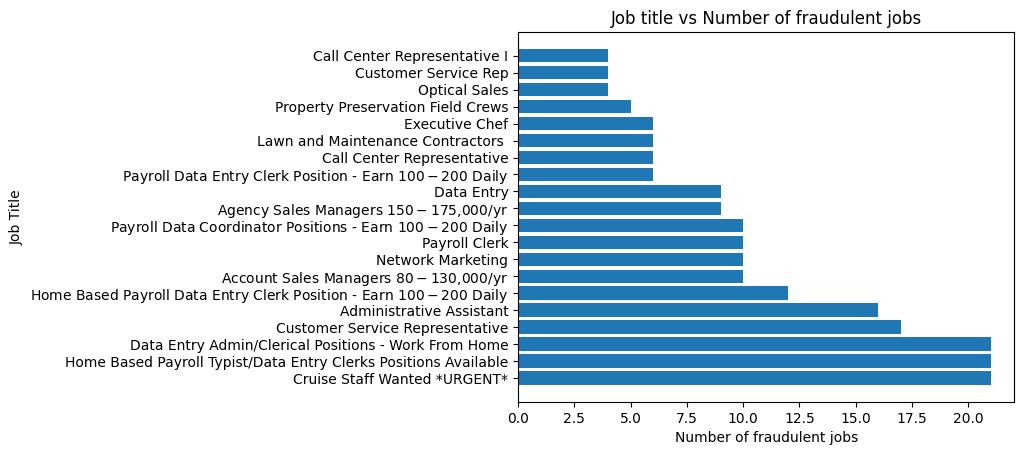

In [576]:
plt.figure()
plt.barh(fraud_by_title['Job Title'], fraud_by_title['fraudulent_jobs'])

plt.xlabel('Number of fraudulent jobs')
plt.ylabel('Job Title')
plt.title('Job title vs Number of fraudulent jobs')
plt.show()

In [577]:
fraud_by_job_location=(
    df.groupby('Job Location')['Fraudulent'].sum().sort_values(ascending=False).head(20).reset_index(name='fraudulent_jobs')
    )

print(fraud_by_job_location)

             Job Location  fraudulent_jobs
0         US, TX, Houston               92
1         AU, NSW, Sydney               31
2                  US, ,                28
3     US, CA, Bakersfield               24
4     US, CA, Los Angeles               23
5       US, CA, San Mateo               22
6        US, NY, New York               20
7        US, CA, San Jose               14
8          US, TX, AUSTIN               14
9          US, TX, DALLAS               12
10  US, CA, San Francisco               11
11      US, MD, Baltimore               11
12               US, CA,                 9
13             US, NY, NY                8
14     US, OH, Cincinnati                8
15         US, TX, Austin                7
16                 MY, ,                 7
17    US, CA, LOS ANGELES                6
18        CA, ON, Toronto                6
19        US, WA, Seattle                6


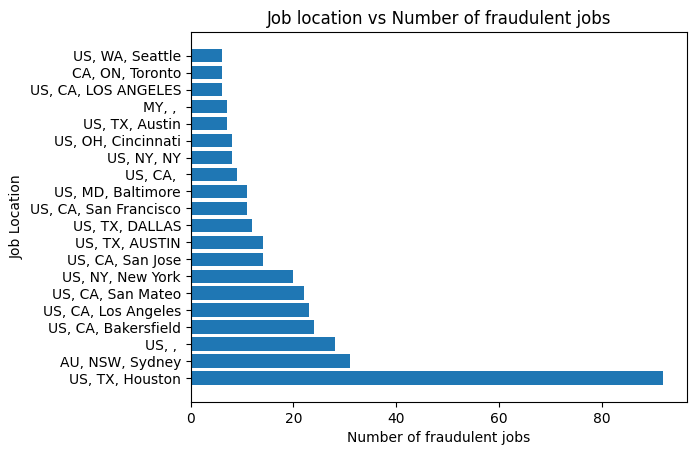

In [578]:
plt.figure()
plt.barh(fraud_by_job_location['Job Location'], fraud_by_job_location['fraudulent_jobs'])

plt.xlabel('Number of fraudulent jobs')
plt.ylabel('Job Location')
plt.title('Job location vs Number of fraudulent jobs')
plt.show()

US, Texas , Houston region has the highest fraud count

In [579]:
fraud_by_department=(
    df.groupby('Department')['Fraudulent'].sum().sort_values(ascending=False).head(20).reset_index(name='fraudulent_jobs')
    )

print(fraud_by_department) 

                 Department  fraudulent_jobs
0               Engineering               46
1                  Clerical               27
2              Oil & Energy               24
3    Information Technology               15
4            Administrative               14
5          Customer Service               14
6                     Sales               12
7   Information Technology                12
8              Engineering                 9
9                     admin                7
10       Accounting/Payroll                6
11       Sales and Research                5
12              CALL CENTER                5
13                    sales                5
14              ENGINEERING                5
15                  Account                4
16         customer service                4
17              Maintenance                4
18            Oil & Energy                 4
19               Data Entry                3


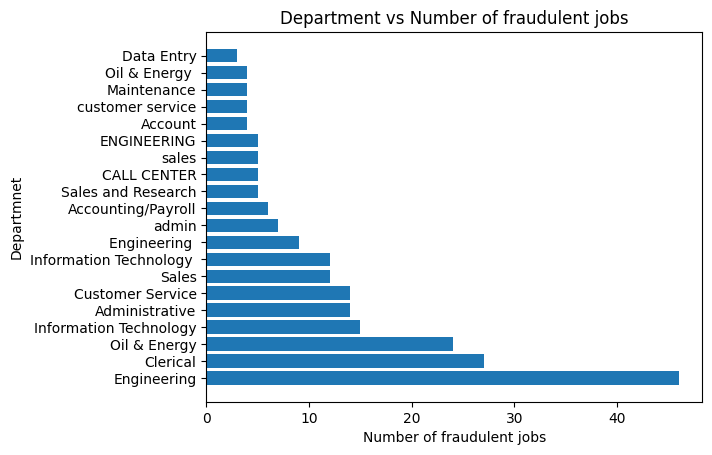

In [580]:
plt.figure()
plt.barh(fraud_by_department['Department'], fraud_by_department['fraudulent_jobs'])

plt.xlabel('Number of fraudulent jobs')
plt.ylabel('Departmnet')
plt.title('Department vs Number of fraudulent jobs')
plt.show()

The Engineering department has the highest fraud count

In [581]:
fraud_by_range_of_salary=(
    df.groupby('Range_of_Salary')['Fraudulent'].sum().sort_values(ascending=False).head(20).reset_index(name='fraudulent_jobs')
    )

print(fraud_by_range_of_salary) 

   Range_of_Salary  fraudulent_jobs
0     7200-1380000               10
1      30000-50000                8
2    250000-500000                7
3      35000-40000                6
4      28000-32000                6
5      70000-80000                5
6      21600-31200                5
7      23000-28000                5
8         21-63000                5
9        1000-2000                5
10     25000-30000                5
11     65000-75000                5
12           13-20                4
13     30000-40000                4
14     65000-80000                4
15             0-0                4
16    95000-115000                4
17     35000-45000                3
18           17-20                3
19     75000-80000                3


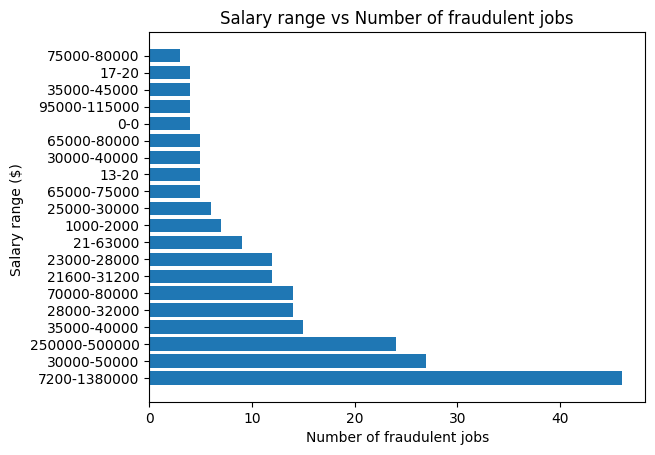

In [582]:
plt.figure()
plt.barh(fraud_by_range_of_salary['Range_of_Salary'], fraud_by_department['fraudulent_jobs'])

plt.xlabel('Number of fraudulent jobs')
plt.ylabel('Salary range ($) ')
plt.title('Salary range vs Number of fraudulent jobs')
plt.show()

The salary range between $7200-$138000 has the highest fraud count

                Operations  fraudulent_jobs
0           Administrative              119
1              Engineering              113
2         Customer Service               67
3                    Sales               41
4   Information Technology               32
5                    Other               32
6      Accounting/Auditing               29
7                  Finance               15
8     Business Development               13
9                Marketing               10
10      Project Management               10
11         Human Resources                9
12              Management                6
13             Advertising                5
14       Financial Analyst                5
15            Data Analyst                4
16              Consulting                4
17            Distribution                3
18                  Design                3
19           Manufacturing                2


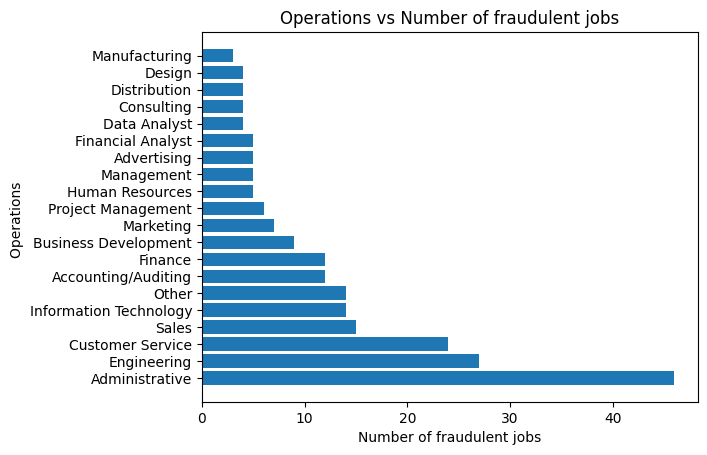

In [583]:
fraud_by_operations=(
    df.groupby('Operations')['Fraudulent'].sum().sort_values(ascending=False).head(20).reset_index(name='fraudulent_jobs')
    )

print(fraud_by_operations) 

plt.figure()
plt.barh(fraud_by_operations['Operations'], fraud_by_department['fraudulent_jobs'])

plt.xlabel('Number of fraudulent jobs')
plt.ylabel('Operations ')
plt.title('Operations vs Number of fraudulent jobs')
plt.show()

The Administrative operation has the highest fraud count

                        Qualification  fraudulent_jobs
0           High School or equivalent              170
1                   Bachelor's Degree              100
2                         Unspecified               61
3                     Master's Degree               31
4         Some High School Coursework               20
5                       Certification               19
6                    Associate Degree                6
7                        Professional                4
8   Some College Coursework Completed                3
9                           Doctorate                1
10                         Vocational                0
11                Vocational - Degree                0
12            Vocational - HS Diploma                0
(13,)
(13,)


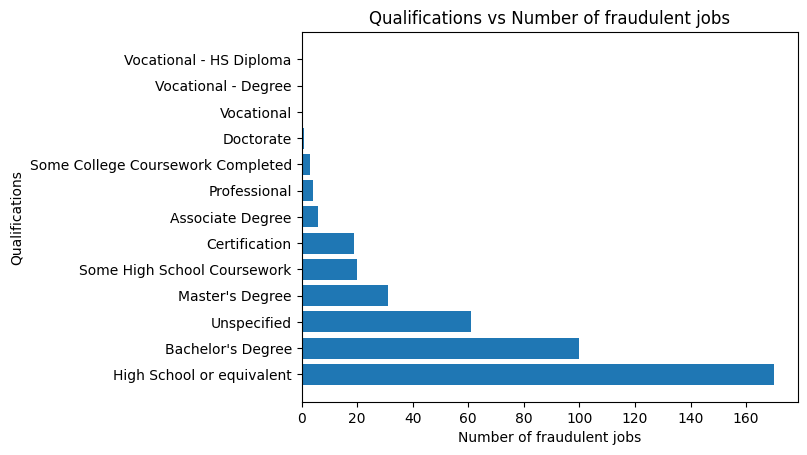

In [584]:
fraud_by_qualifications=(
    df.groupby('Qualification')['Fraudulent'].sum().sort_values(ascending=False).head(20).reset_index(name='fraudulent_jobs')
    )

print(fraud_by_qualifications) 
print(fraud_by_qualifications['Qualification'].shape)
print(fraud_by_qualifications['fraudulent_jobs'].shape)


plt.figure()
plt.barh(fraud_by_qualifications['Qualification'], fraud_by_qualifications['fraudulent_jobs'])

plt.xlabel('Number of fraudulent jobs')
plt.ylabel('Qualifications')
plt.title('Qualifications vs Number of fraudulent jobs')
plt.show()

The Highschool or equivalent qualification has the highest fraud count

In [585]:
def fraud_rate_table(df, col, target="Fraudulent", min_count=30):
    """
    Computes fraud count, total count, and fraud rate per category.
    Filters small groups for stability.
    """
    summary = (
        df.groupby(col)[target]
          .agg(
              total_count="count",
              fraud_count="sum",
              fraud_rate="mean"
          )
          .reset_index()
    )
    
    summary = summary[summary["total_count"] >= min_count]
    summary = summary.sort_values("fraud_rate", ascending=False)
    
    return summary


In [586]:
# Fraud rate for the features : job title, job location, department, range of salary, operations and qualification.

job_title_fraud_rate = fraud_rate_table(df, "Job Title")
location_fraud_rate = fraud_rate_table(df, "Job Location")
department_fraud_rate = fraud_rate_table(df, "Department")
range_of_salary_fraud_rate = fraud_rate_table(df, "Range_of_Salary")
operations_fraud_rate = fraud_rate_table(df, "Operations")
qualifications_fraud_rate = fraud_rate_table(df, "Qualification")



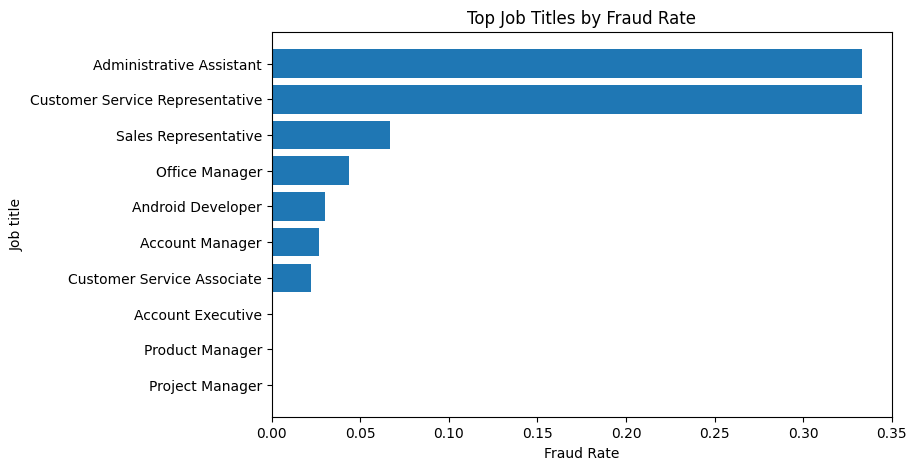

In [587]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    job_title_fraud_rate["Job Title"].head(10),job_title_fraud_rate["fraud_rate"].head(10))
   
plt.xlabel("Fraud Rate")
plt.ylabel('Job title')
plt.title("Top Job Titles by Fraud Rate")
plt.gca().invert_yaxis()
plt.show()


The Administrative Assistant job title has the highest fraud rate . This means this job title has the highest likelihood of fraudulent job postings

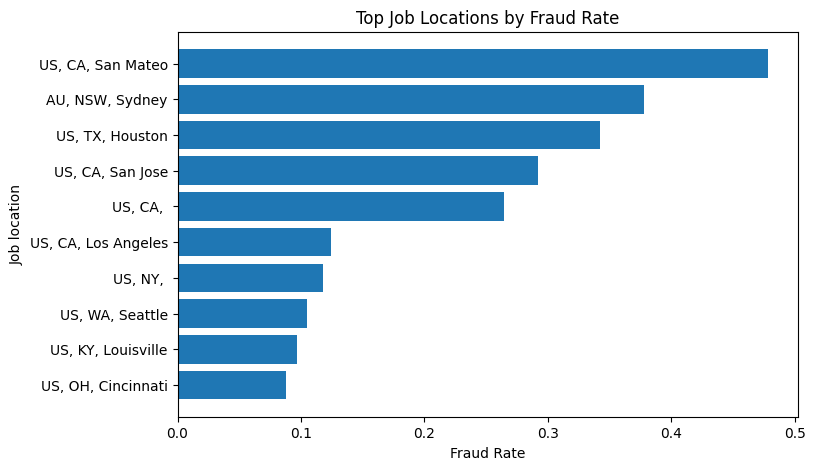

In [588]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
   location_fraud_rate["Job Location"].head(10),location_fraud_rate["fraud_rate"].head(10))
   
plt.xlabel("Fraud Rate")
plt.ylabel('Job location')
plt.title("Top Job Locations by Fraud Rate")
plt.gca().invert_yaxis()
plt.show()

The region US,CA,San Mateo has the highest fraud rate. This means this region has the highest likelihood of fraudulent job postings

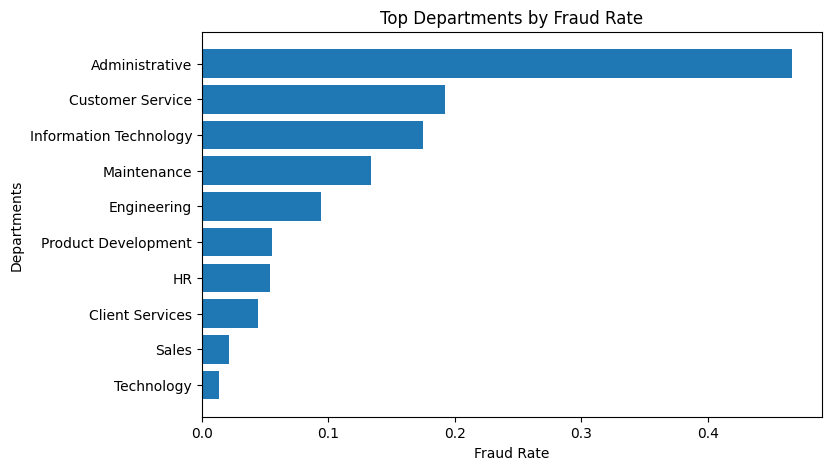

In [589]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
department_fraud_rate["Department"].head(10),department_fraud_rate["fraud_rate"].head(10))
   
plt.xlabel("Fraud Rate")
plt.ylabel('Departments')
plt.title("Top Departments by Fraud Rate")
plt.gca().invert_yaxis()
plt.show()

The Administrative department has the highest fraud rate. This means this departmnet has the highest likelihood of fraudulent job postings

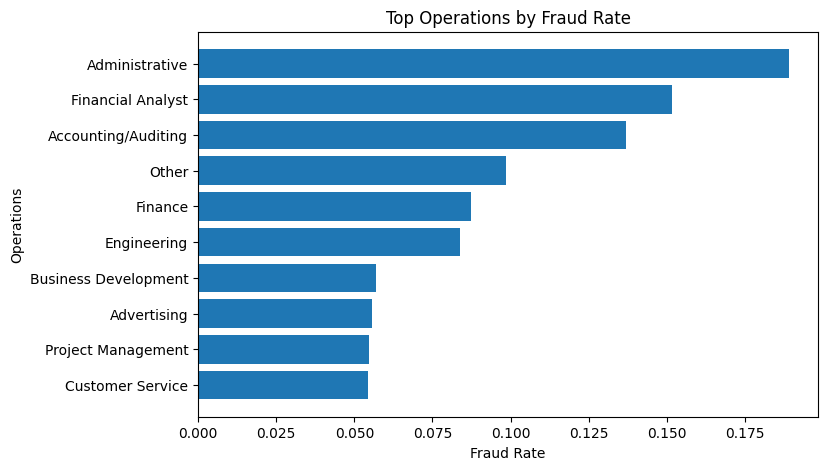

In [590]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    operations_fraud_rate["Operations"].head(10),operations_fraud_rate["fraud_rate"].head(10))
   
plt.xlabel("Fraud Rate")
plt.ylabel('Operations')
plt.title("Top Operations by Fraud Rate")
plt.gca().invert_yaxis()
plt.show()

The operation Administrative  has the highest fraud rate. This means this operation has the highest likelihood of fraudulent job postings

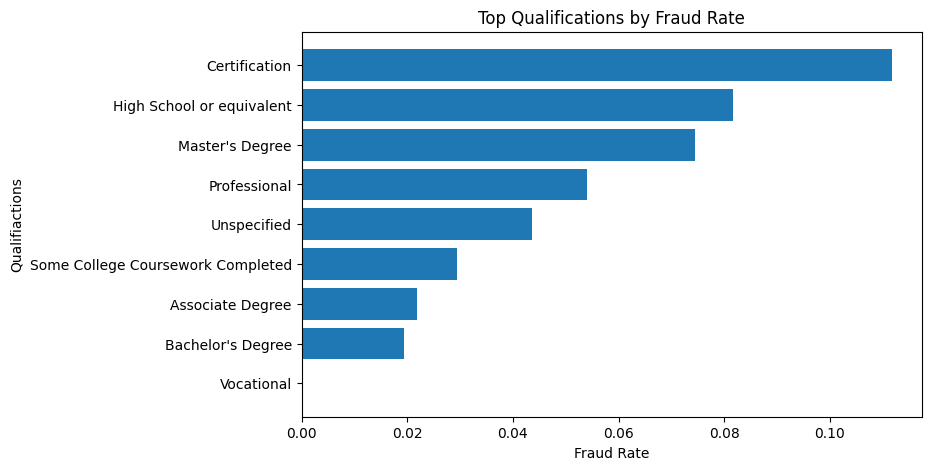

In [591]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(qualifications_fraud_rate["Qualification"].head(10),qualifications_fraud_rate["fraud_rate"].head(10))
   
plt.xlabel("Fraud Rate")
plt.ylabel('Qualifiactions')
plt.title("Top Qualifications by Fraud Rate")
plt.gca().invert_yaxis()
plt.show()

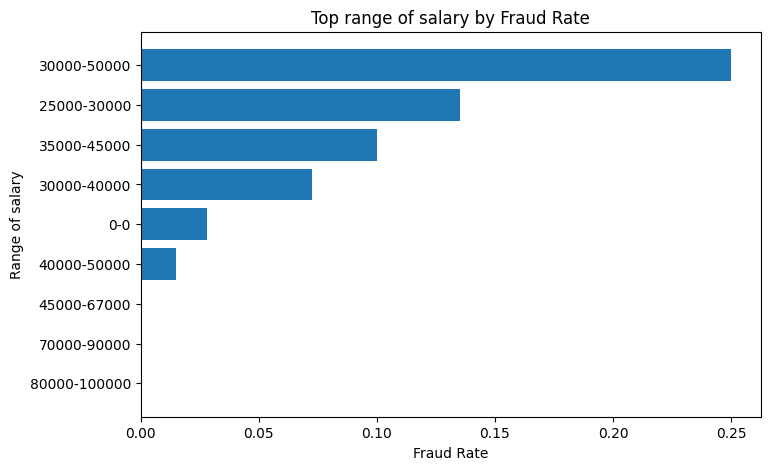

In [592]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    range_of_salary_fraud_rate["Range_of_Salary"].head(10),range_of_salary_fraud_rate["fraud_rate"].head(10))
   
plt.xlabel("Fraud Rate")
plt.ylabel('Range of salary')
plt.title("Top range of salary by Fraud Rate")
plt.gca().invert_yaxis()
plt.show()

The range of salary range $30000-$50000  has the highest fraud rate. This means this range of salary  has the highest likelihood of fraudulent job postings

Class distribution:
Fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64

Fraud prevalence: 4.84%


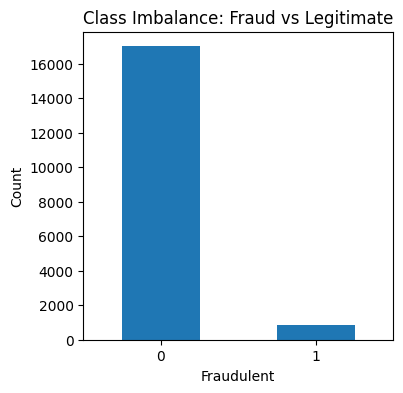

In [593]:
class_dist = df["Fraudulent"].value_counts(normalize=True)

print("Class distribution:")
print(class_dist)

print(f"\nFraud prevalence: {class_dist[1]*100:.2f}%")

plt.figure(figsize=(4,4))
df["Fraudulent"].value_counts().plot(kind="bar")
plt.title("Class Imbalance: Fraud vs Legitimate")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



The target variable  has about 95% of its data as negative for fraud postings and about 5% positive fraud postings.So, the target classes are not represented equally. The dataset is an imbalanced dataset. The imbalanced dataset will undergo evaluation and then SMOTE will be used to handle the imbalanced dataset.

In [594]:
def category_comparison(df, col, target="Fraudulent"):
    comparison = (
        df.groupby([col, target])
          .size()
          .unstack(fill_value=0)
    )
    
    comparison["fraud_rate"] = (
        comparison[1] / (comparison[0] + comparison[1])
    )
    
    return comparison.sort_values("fraud_rate", ascending=False)


Part time status job postings have a highest likelihood of fraud postings and temporary status job postings have the lowest likelihood.

In [595]:
category_comparison(df, "Type_of_Employment").head(10)


Fraudulent,0,1,fraud_rate
Type_of_Employment,,,
Part-time,723,74,0.092848
Other,212,15,0.066079
Full-time,11130,490,0.042169
Contract,1480,44,0.028871
Temporary,239,2,0.008299


A dependence test between the business important categorical features and the target variable was made.
A chi square test of independence was used as the statistical test to determine whether there is any dependence between the each categorical feature and the target variable. A p value less than 0.05 means there is dependency between the target variable and categorical feature.

In [596]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["Department"], df["Fraudulent"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square p-value: {p:.6f}")


Chi-square p-value: 0.000000


In [597]:
# test for dependence between Department and target variable.
contingency = pd.crosstab(df["Department"], df["Fraudulent"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square p-value: {p:.6f}")


Chi-square p-value: 0.000000


In [598]:
# test for dependence between qualification and target variable.
contingency = pd.crosstab(df["Qualification"], df["Fraudulent"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square p-value: {p:.6f}")


Chi-square p-value: 0.000000


In [599]:
# test for dependence between Range of salary and target variable.

contingency = pd.crosstab(df["Range_of_Salary"], df["Fraudulent"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square p-value: {p:.6f}")


Chi-square p-value: 0.000000


In [600]:
# test for dependence between operations and target variable.

contingency = pd.crosstab(df["Operations"], df["Fraudulent"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square p-value: {p:.6f}")


Chi-square p-value: 0.000000


In [601]:
# test for dependence between Job location and target variable.

contingency = pd.crosstab(df["Job Location"], df["Fraudulent"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square p-value: {p:.6f}")


Chi-square p-value: 0.000000


In [602]:
# test for dependence between Job title and target variable.

contingency = pd.crosstab(df["Job Title"], df["Fraudulent"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square p-value: {p:.6f}")

Chi-square p-value: 0.000000


In [603]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=10)
    # Rename legend
    plt.legend(["Not fraud", "Fraud"], loc=legend_)
    # Labels
    plt.ylabel("Profile  (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [604]:
department = df[['Profile', 'Qualification','Fraudulent']]
department = department.groupby([department['Qualification'], department['Fraudulent']])['Profile'].count().unstack(level=1).fillna(0)
department_fraud = (department.div(department.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

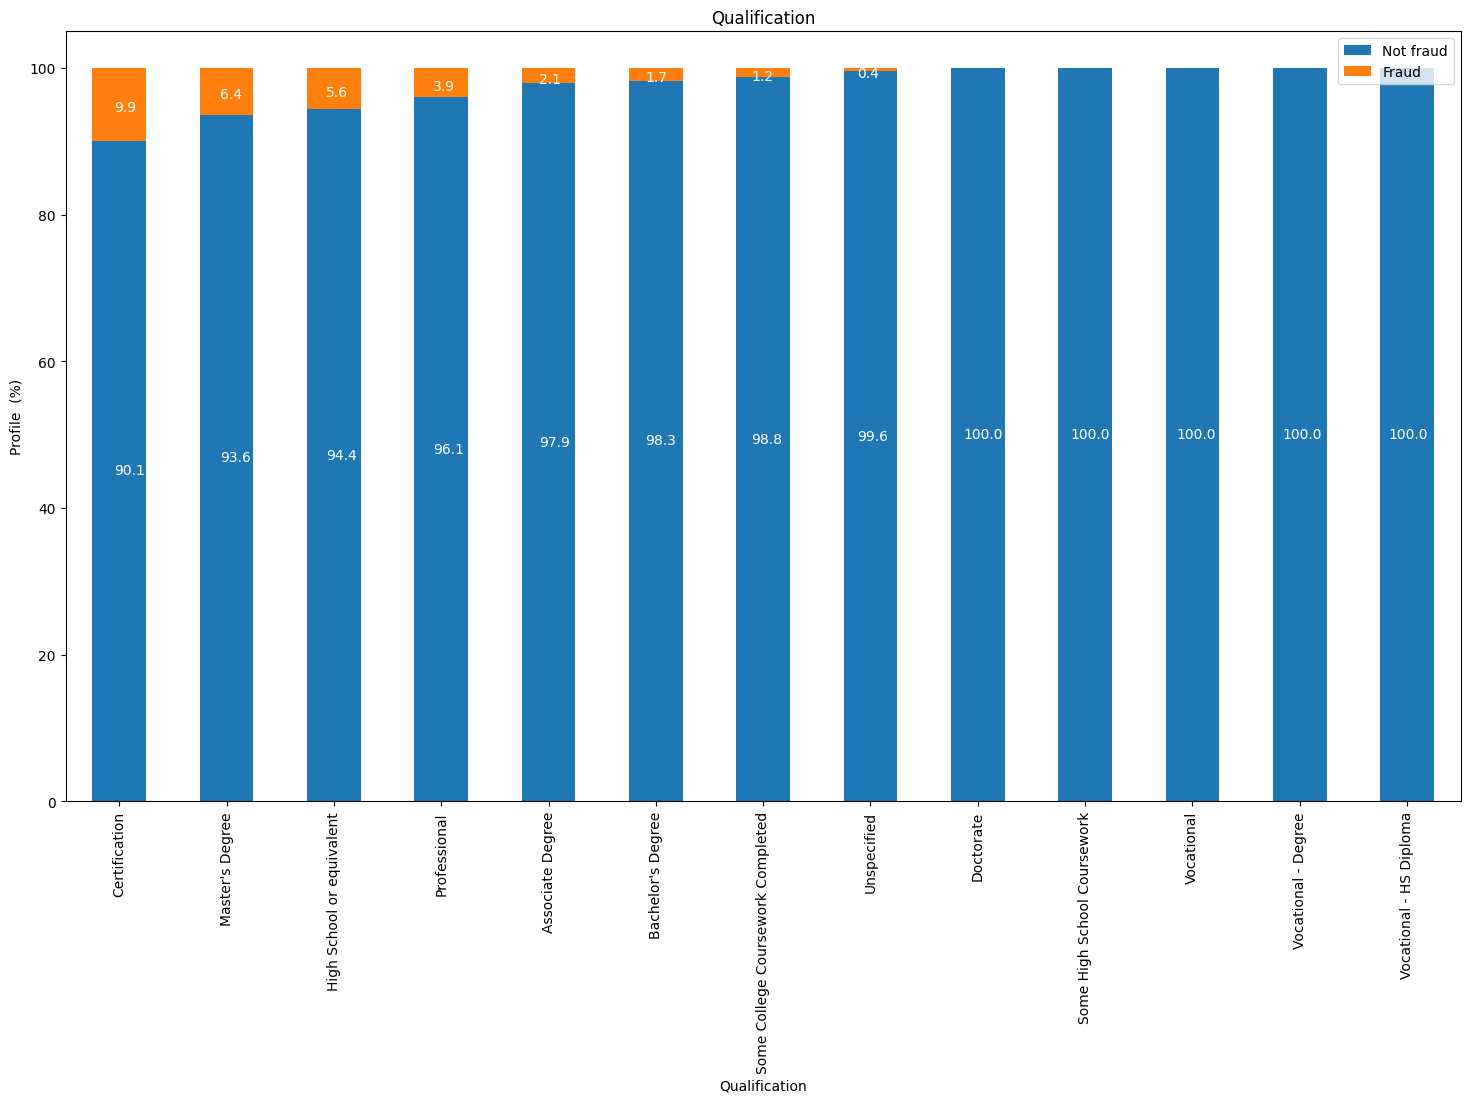

In [605]:
plot_stacked_bars(department_fraud, 'Qualification', rot_=90)

The qualification level with the highest proportion of fraudulent profiles is the the certification (i.e online certification). This might be because certifications are used by many people compared to qualification levels like doctorates which are not held by many people.

In [606]:
# Defining the function that gives the feature for profile length

import numpy as np 
def profile_length(X):
    X = np.asarray(X).ravel()  # flatten to 1D
    X = np.where(X == None, '', X)
    X = np.array([len(str(x)) for x in X])
    return X.reshape(-1, 1)


In [607]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Fraudulent'])
y= df['Fraudulent']

profile_col = ['Profile']           # isolating the profile column because the feature engineering will be performed inside the pipeline
categorical_cols = (
    X.select_dtypes(include='object')
     .drop(columns=profile_col)
     .columns
     .tolist()    
)    # list of catogorical featuresS
numerical_cols = X.select_dtypes(include='int64').columns.tolist()  # list of numerical features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42) # split into training and test data
model = linear_model.LogisticRegression(random_state=42)   # model definition

# Feature engineering and pipeline transformation

I used Machine learning pipelines to prevent data leakage , to enhance reproducability and for convinience of data preprocessing. I performed feature engineering in the pipeline using transformers (FunctionTrabformer). The engineering of this feature is inspred by the hypothesis.

In [608]:
from sklearn.impute import SimpleImputer

profile_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('profile_length', FunctionTransformer(profile_length, validate=False))
])
numerical_cols_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
categorical_cols_transformer= Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent' )),('onehotencoder', OneHotEncoder(handle_unknown='ignore'))] )

preprocessor = ColumnTransformer([('num',numerical_cols_transformer,numerical_cols),('cat',categorical_cols_transformer,categorical_cols),('profile',profile_transformer,profile_col)],remainder='drop'
    
)
pipeline = Pipeline([('preprocessor',preprocessor),('model',model)])  

# Train model
pipeline.fit(X_train, y_train)







c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [609]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_prob = pipeline.predict_proba(X_test)[:, 1]   # required for threshold tuning


# Predicted classes (default threshold 0.5)
y_pred = pipeline.predict(X_test)



The accuracy score was omoitted since it is misleading in classification problems. The metrics used to evaluate the model effectiveness are the precision score , recall score and f1_score. The model achieved precision score of 77.4% , recall score of 23.7% and f1_score of 36.3%. The value of the precision score means that 77.4% of job postings flagged as fraudulent are actual frauds . The recall score is very low, it means that only 23.7% of fraudulent job postings are detected. The f1_score is very low . This is a not a cost effective result as 76.3% of fraudulent jobs are not detected. This is a huge loss for the business.Threshold tuning was performed to obtain a reasonable recall and precision score . The poor performance of model is caused by imbalanced nature of the dataset.

In [610]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Precision: 0.774
Recall:    0.237
F1-score:  0.363


## Cross validation evaluation on the model 

In [611]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score , make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
# Using cross validation to give a much more accurate evaluation of model .
# cross validation used 10 data splits

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# lists for the metric value for each fold/split
fold_precision=[]
fold_recall=[]
fold_roc_auc=[]
fold_f1 = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X,y)):
    print(f'Fold {fold+1}')
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]  #separating into training data
    y_train , y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_val)
    
    y_prob = pipeline.predict_proba(X_val)[:, 1]
    y_pred_thresh = (y_prob>0.5).astype(int)  # using threshold of 0.5
    
    
    pre= precision_score(y_val,y_pred_thresh)
    rec = recall_score(y_val,y_pred_thresh)
    roc = roc_auc_score(y_val,y_pred_thresh)
    f1= f1_score(y_val,y_pred_thresh)
    
    print('precision :',pre)
    print('recall score :', rec)
    print('ROC_AUC score :',roc)
    print('F1 score :',f1)
    
    
    fold_precision.append(pre)
    fold_recall.append(rec)
    fold_roc_auc.append(roc)     
    fold_f1.append(f1)
    
print('Mean precision:', np.mean(fold_precision))
print('Mean recall:', np.mean(fold_recall))
print('Mean ROC AUC :', np.mean(fold_roc_auc))


Fold 1


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.8269230769230769
recall score : 0.5
ROC_AUC score : 0.7473560517038779
F1 score : 0.6231884057971014
Fold 2


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.8333333333333334
recall score : 0.23255813953488372
ROC_AUC score : 0.6151039816358319
F1 score : 0.36363636363636365
Fold 3


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.8108108108108109
recall score : 0.3488372093023256
ROC_AUC score : 0.6723622004208455
F1 score : 0.4878048780487805
Fold 4


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.8775510204081632
recall score : 0.5
ROC_AUC score : 0.7482373678025852
F1 score : 0.6370370370370371
Fold 5


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.75
recall score : 0.3793103448275862
ROC_AUC score : 0.6864217802915121
F1 score : 0.5038167938931297
Fold 6


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.7941176470588235
recall score : 0.3103448275862069
ROC_AUC score : 0.6531148006243791
F1 score : 0.4462809917355372
Fold 7


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.7631578947368421
recall score : 0.3333333333333333
ROC_AUC score : 0.664021164021164
F1 score : 0.464
Fold 8


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.6666666666666666
recall score : 0.16091954022988506
ROC_AUC score : 0.5784021569462182
F1 score : 0.25925925925925924
Fold 9


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.6410256410256411
recall score : 0.28735632183908044
ROC_AUC score : 0.6395629345820917
F1 score : 0.3968253968253968
Fold 10


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.7222222222222222
recall score : 0.2988505747126437
ROC_AUC score : 0.64648583997243
F1 score : 0.42276422764227645
Mean precision: 0.768580831318558
Mean recall: 0.3351510291365945
Mean ROC AUC : 0.6651068278000934


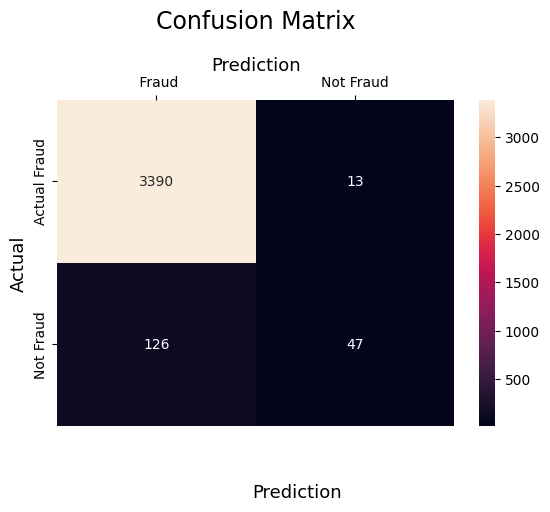

In [612]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=[' Fraud','Not Fraud'],
            yticklabels=['Actual Fraud','Not Fraud'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

# Feature importance Analysis

This section is about the extraction of global feature importance from the logit regression model

In [613]:
import sklearn


preprocessor = pipeline.named_steps['preprocessor']  # extracting the preprocessing steps
model = pipeline.named_steps['model']  # extracting model from the pipeline
num_features = numerical_cols   # the list of numerical features
cat_pipeline = preprocessor.named_transformers_['cat']   # the pipeline transformations on categorical columns from pipeline including onehot encoded columns

In [614]:

ohe = cat_pipeline.named_steps['onehotencoder']   # extracting onehotencoded features
cat_features = ohe.get_feature_names_out(categorical_cols)  # feature names of categorical columns including the onehot encoded
print(len(cat_features))
profile_length_features =np.array(['profile_length'])  # profile length column

feature_names = np.concatenate([num_features,cat_features,profile_length_features])  # All feature names

coefficients = model.coef_.flatten()  # feature importance value of each feature


feature_importance = pd.DataFrame({'feature':feature_names,'coefficients':coefficients,'abs_importance': np.abs(coefficients)}).sort_values('abs_importance',ascending=False)


def original_feature(feature):
    for col in categorical_cols:
        if feature.startswith(col+'_'):
            return col
    return feature
    
feature_importance['original_feature']=feature_importance['feature'].apply(original_feature)

agg_feature_importance = (
    feature_importance.groupby('original_feature')['abs_importance'].mean().sort_values(ascending=False)
)


agg_feature_importance       
    

45403


original_feature
Company_Logo          0.741136
Experience            0.469026
Type_of_Employment    0.453286
Qualification         0.327688
Operations            0.247366
Type_of_Industry      0.119949
Telecomunication      0.039358
Department            0.013489
Range_of_Salary       0.013279
Job Location          0.012998
Job_Benefits          0.005405
Job Title             0.004992
Requirements          0.003989
Job_Description       0.003942
profile_length        0.000522
Name: abs_importance, dtype: float64

The profile length has the least feature importance value . The feature 'Company_Logo' has the highest importance value. This means that the profile length has the least global impact and the company logo presence has the most global impact on the model prediction.This seems to disprove the initial hypothesis that profile length is indicative of the fraud status of the feature.

 # SMOTE Analysis

 The SMOTE was  used to handle the target class imbalanced dataset. This was done to remove the bias caused by the majority class in the target training data. Cross validation using 10 stratified folds was used for evaluation.

In [615]:
from imblearn.pipeline  import Pipeline as Imbpipeline
from imblearn.over_sampling import SMOTE


pipeline=Imbpipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random_state=42)),('model',model)])

In [616]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Precision: 0.227
Recall:    0.844
F1-score:  0.358


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Achieved a precision score of 22.7% , recall score of 84.4% and f1 score of 35.8 %

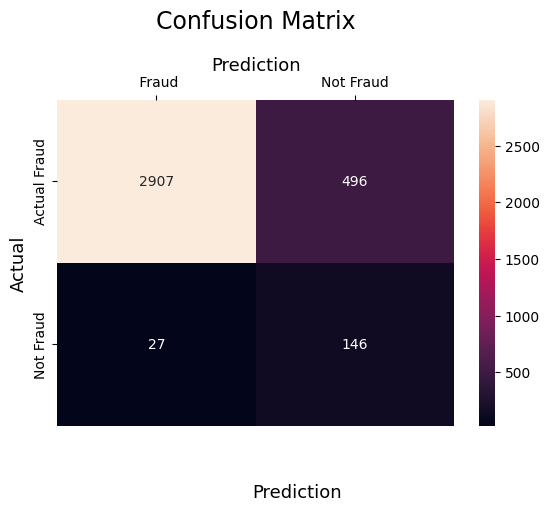

In [617]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=[' Fraud','Not Fraud'],
            yticklabels=['Actual Fraud','Not Fraud'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

### Cost-Based Threshold Tuning (Business-Oriented Evaluation)

In a job fraud detection system, different classification errors incur different business costs.

- **False Negative (FN)**: A fraudulent job posting is not detected.  
  This leads to financial loss, reputational damage, and potential harm to job seekers.
- **False Positive (FP)**: A legitimate job posting is flagged as fraudulent.  
  This results in manual review costs and minor user inconvenience.

Since missing a fraudulent job posting is significantly more costly than incorrectly flagging a legitimate one, a higher cost is assigned to false negatives.

Instead of using a default probability threshold of 0.5, threshold tuning is performed by **minimizing the expected business cost**, defined as:

Expected Cost = (False Positives × Cost_FP) + (False Negatives × Cost_FN)

The threshold that minimizes this cost is selected as the optimal decision threshold.

In [ ]:
# Predicted probabilities
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Business cost assumptions
COST_FP = 1     # cost of flagging a legitimate job
COST_FN = 10    # cost of missing a fraudulent job

thresholds = np.linspace(0.01, 0.99, 99)
expected_costs = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    
    cost = (fp * COST_FP) + (fn * COST_FN)
    expected_costs.append(cost)

# Optimal threshold
optimal_idx = np.argmin(expected_costs)
optimal_threshold = thresholds[optimal_idx]

print('The optimal threshold is :' ,optimal_threshold)


The optimal threshold is :  0.68


The optimal threshold was found to be 0.68

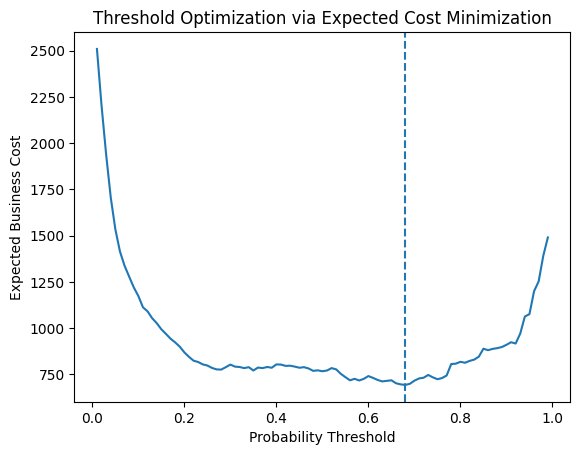

In [619]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(thresholds, expected_costs)
plt.axvline(optimal_threshold, linestyle='--')
plt.xlabel("Probability Threshold")
plt.ylabel("Expected Business Cost")
plt.title("Threshold Optimization via Expected Cost Minimization")
plt.show()


Plot visualization of the expected cost plotted against the probability threshold. This gives a clearer visual of the relationship between the threshold and the expected cost.

In [ ]:
# Computing the model metrics for each threshold probability
thresholds = [0.05, 0.20, 0.5, 0.68,0.75]

for t in thresholds:
    y_pred_thresh = (y_prob > t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {t:.2f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")

Threshold: 0.05 | Precision: 0.101 | Recall: 1.000 | F1: 0.184
Threshold: 0.20 | Precision: 0.172 | Recall: 0.960 | F1: 0.292
Threshold: 0.50 | Precision: 0.227 | Recall: 0.844 | F1: 0.358
Threshold: 0.68 | Precision: 0.339 | Recall: 0.746 | F1: 0.466
Threshold: 0.75 | Precision: 0.383 | Recall: 0.694 | F1: 0.494


The most cost effective precision score is 33.9% , the most cost effective recall score is 74.6 % with an f1 score of 46.6%. This means that the most cost effective model will detect 74.6 % of the fraudulent job postings and 33.9% of the flagged posts will be actual frauds.

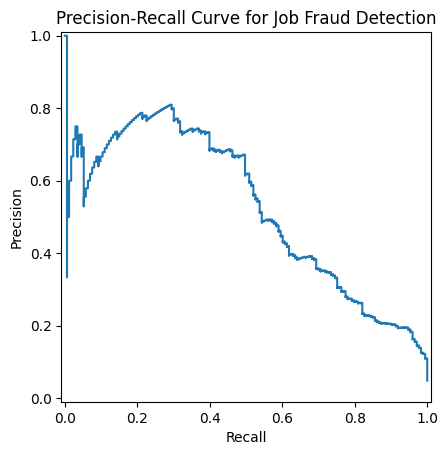

In [ ]:
# The precision recall curve 
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve for Job Fraud Detection")
plt.show()

The precision-recall curve shows the trade off between the precision score and the recall score.  

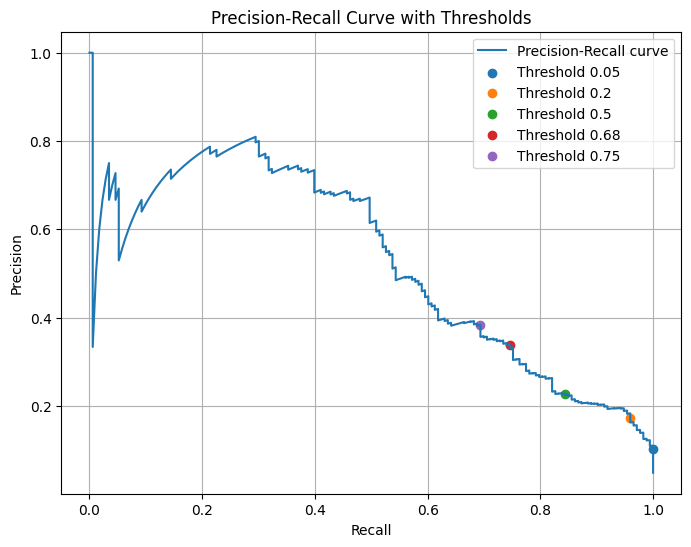

In [ ]:
highlight = [0.05, 0.20, 0.5,0.68, 0.75]
# The precison recall curve with the probability thresholds being indicated on the curve 
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='Precision-Recall curve')

for t in highlight:
    # find closest threshold index
    idx = np.argmin(np.abs(thresholds - t))
    plt.scatter(recall[idx], precision[idx], label=f'Threshold {t}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Thresholds")
plt.legend()
plt.grid(True)
plt.show()

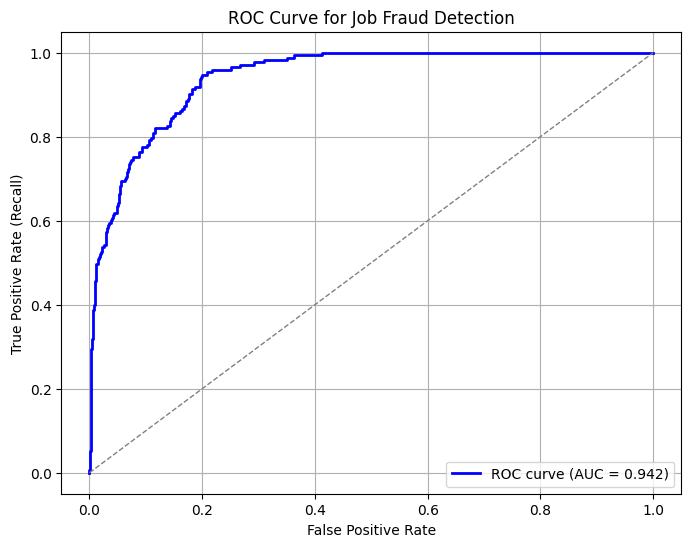

In [623]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Job Fraud Detection")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The ROC_AUC score is 0.942 . This means that te model is not random and is capable of describing the problem and dataset

In [624]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score , make_scorer
# Using cross validation to give a much more accurate evaluation of model .
# cross validation used 10 data splits

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# lists for the metric value for each fold/split
fold_precision=[]
fold_recall=[]
fold_roc_auc=[]
fold_f1=[]

for fold, (train_idx, val_idx) in enumerate(kf.split(X,y)):
    print(f'Fold {fold+1}')
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]  #separating into training data
    y_train , y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_val)
    
    y_prob = pipeline.predict_proba(X_val)[:, 1]
    y_pred_thresh = (y_prob>0.68).astype(int)  # using threshold of 0.20
    
    
    pre= precision_score(y_val,y_pred_thresh)
    rec = recall_score(y_val,y_pred_thresh)
    roc = roc_auc_score(y_val,y_pred_thresh)
    f1 = f1_score(y_val,y_pred_thresh)
    
    print('precision :',pre)
    print('recall score :', rec)
    print('ROC_AUC score :',roc)
    print('F1 SCORE : ',f1)
    
    
    fold_precision.append(pre)
    fold_recall.append(rec)
    fold_roc_auc.append(roc)
    fold_f1.append(f1)
    
print('Mean precision:', np.mean(fold_precision))
print('Mean recall:', np.mean(fold_recall))
print('Mean ROC AUC :', np.mean(fold_roc_auc))
print('Mean F1 score : ',np.mean(fold_f1))


Fold 1


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.2837209302325581
recall score : 0.7093023255813954
ROC_AUC score : 0.8094102697237177
F1 SCORE :  0.4053156146179402
Fold 2


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.44166666666666665
recall score : 0.6162790697674418
ROC_AUC score : 0.7884568086792556
F1 SCORE :  0.5145631067961165
Fold 3


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.3244444444444444
recall score : 0.8488372093023255
ROC_AUC score : 0.8797652556499878
F1 SCORE :  0.4694533762057878
Fold 4


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.3202247191011236
recall score : 0.6627906976744186
ROC_AUC score : 0.7958489328560108
F1 SCORE :  0.4318181818181818
Fold 5


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.3114754098360656
recall score : 0.6551724137931034
ROC_AUC score : 0.7905491698595147
F1 SCORE :  0.4222222222222222
Fold 6


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.3160621761658031
recall score : 0.7011494252873564
ROC_AUC score : 0.8117740071763061
F1 SCORE :  0.4357142857142857
Fold 7


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.26666666666666666
recall score : 0.6436781609195402
ROC_AUC score : 0.776571590747836
F1 SCORE :  0.3771043771043771
Fold 8


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.3333333333333333
recall score : 0.7011494252873564
ROC_AUC score : 0.814713454560198
F1 SCORE :  0.45185185185185184
Fold 9


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.33678756476683935
recall score : 0.7471264367816092
ROC_AUC score : 0.8359382918769892
F1 SCORE :  0.4642857142857143
Fold 10


c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision : 0.30978260869565216
recall score : 0.6551724137931034
ROC_AUC score : 0.7902552251211256
F1 SCORE :  0.42066420664206644
Mean precision: 0.3244164519909153
Mean recall: 0.694065757818765
Mean ROC AUC : 0.8093283006250941
Mean F1 score :  0.4392992937258544


I selected the most optimal probability threshold and used cross validation on the dataset to get more reliable evaluation of the model at the selected probability  threshold. From the cross validation result , I found that the precison score is 32.44% , recall score is 69.4 % ,ROC_AUC score is 80.93% and the F1 score is 43.93%. 

In [625]:
import sklearn


preprocessor = pipeline.named_steps['preprocessor']  # extracting the preprocessing steps
model = pipeline.named_steps['model']  # extracting model from the pipeline
num_features = numerical_cols   # the list of numerical features
cat_pipeline = preprocessor.named_transformers_['cat']   # the pipeline transformations on categorical columns from pipeline including onehot encoded columns

# Feature Importance Analysis after SMOTE

In [626]:
ohe = cat_pipeline.named_steps['onehotencoder']   # extracting onehotencoded features
cat_features = ohe.get_feature_names_out(categorical_cols)  # feature names of categorical columns including the onehot encoded
print(len(cat_features))
profile_length_features =np.array(['profile_length'])  # profile length column

feature_names = np.concatenate([num_features,cat_features,profile_length_features])  # All feature names

coefficients = model.coef_.flatten()  # feature importance value of each feature


feature_importance = pd.DataFrame({'feature':feature_names,'coefficients':coefficients,'abs_importance': np.abs(coefficients)}).sort_values('abs_importance',ascending=False)


def original_feature(feature):
    for col in categorical_cols:
        if feature.startswith(col+'_'):
            return col
    return feature
    
feature_importance['original_feature']=feature_importance['feature'].apply(original_feature)

agg_feature_importance = (
    feature_importance.groupby('original_feature')['abs_importance'].mean().sort_values(ascending=False)
)


agg_feature_importance

45403


original_feature
Company_Logo          1.163473
Experience            0.594943
Qualification         0.491383
Type_of_Employment    0.479592
Operations            0.355997
Type_of_Industry      0.192712
Telecomunication      0.067877
Department            0.020822
Job Location          0.020353
Range_of_Salary       0.017665
Job Title             0.007844
Job_Benefits          0.007823
Job_Description       0.006147
Requirements          0.006097
profile_length        0.000936
Name: abs_importance, dtype: float64

This is the feature importance table after SMOTE. The table gives global importance of each feature in the model . The 'profile length' is still the least important feature in this table and the 'Compay_Logo' feature is the most important feature.

In [627]:
# table showing the precision score and recall score for each threshold 
y_probs = pipeline.predict_proba(X)[:,1]

precisions,recalls,thresholds = precision_recall_curve(y,y_probs)

df_thresh = pd.DataFrame({
    'thresholds': thresholds,
    'precisions' : precisions[:-1],
    'recalls' : recalls[:-1]
    
})

df_thresh.sort_values('recalls',ascending=False).head(10)


,thresholds,precisions,recalls
0,0.000009,0.048434,1.0
1590,0.001887,0.053659,1.0
1538,0.001825,0.053424,1.0
1539,0.001826,0.053427,1.0
1540,0.001826,0.053430,1.0
1541,0.001827,0.053434,1.0
1542,0.001831,0.053440,1.0
1543,0.001832,0.053444,1.0
1544,0.001832,0.053447,1.0
1545,0.001832,0.053450,1.0


# SHAP Interpretation and analysis

I am using SHAP values and analysis to interpret the individual contribution of each feature. This is much more diagnostic than the model global feature importance analysis.
Mean absolute SHAP values are used to quantify te overall importance of each feature regardless of its directional effect.

In [628]:
import shap
import pandas as pd
import numpy as np

pipeline.fit(X_train, y_train)



preprocessor = pipeline.named_steps['preprocessor']


# numeric features
num_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols)

# categorical features (OneHotEncoder)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# profile length (FunctionTransformer → manual name)
profile_feature_names = np.array(['profile_length'])

# combine all
feature_names = np.concatenate([
    num_feature_names,
    cat_feature_names,
    profile_feature_names
])

X_trained_transformed = pipeline.named_steps['preprocessor'].transform(X_train)



model = pipeline.named_steps['model']



sample_idx = np.random.choice(X_trained_transformed.shape[0], 1000, replace=False)
X_sample = X_trained_transformed[sample_idx]

explainer = shap.LinearExplainer(model, X_sample, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_sample)



def original_feature(feature):
    for col in categorical_cols:
        if feature.startswith(col+'_'):
            return col
    return feature



# Mean absolute SHAP value per feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)
mean_shap = np.array(shap_values).mean(axis=0)

mapped_features = [original_feature(f) for f in feature_names]

shap_feature_df = pd.DataFrame({
    "feature": mapped_features ,
    "mean_abs_shap": mean_abs_shap
})

# Sort by importance
shap_feature_df = shap_feature_df.sort_values(
    by="mean_abs_shap",
    ascending=False
).reset_index(drop=True)



mean_abs_shap_agg = shap_feature_df.groupby("feature").mean().reset_index()

mean_abs_shap_agg










# Aggregate (sum absolute SHAP per original feature)
# shap.force_plot(explainer.expected_value,shap_values[0],X_trained_transformed[0],feature_names=feature_names)






c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sibus\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


,feature,mean_abs_shap
0,Company_Logo,1.081244
1,Department,0.000623
2,Experience,0.130933
3,Job Location,0.000163
4,Job Title,0.000010
5,Job_Benefits,0.000043
6,Job_Description,0.000004
7,Operations,0.027941
8,Qualification,0.081680
9,Range_of_Salary,0.000295


In [629]:
shap_feature_df_ori = pd.DataFrame({
    "feature": mapped_features ,
    "mean_shap": mean_shap
})

# Sort by importance
shap_ori_feature_df = shap_feature_df_ori.sort_values(
    by="mean_shap",
    ascending=False
).reset_index(drop=True)

mean_shap_agg = shap_ori_feature_df.groupby("feature").mean().reset_index()



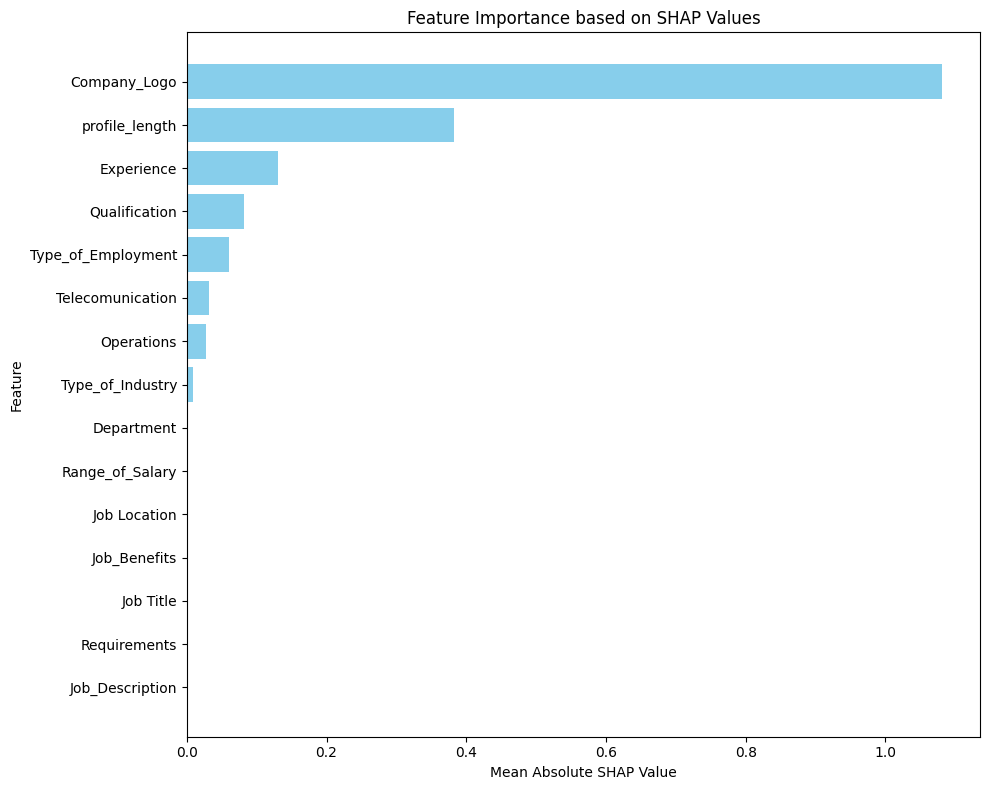

In [630]:
mean_abs_shap_agg_sorted = mean_abs_shap_agg.sort_values(by="mean_abs_shap", ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(mean_abs_shap_agg_sorted['feature'], mean_abs_shap_agg_sorted['mean_abs_shap'], color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on SHAP Values')
plt.tight_layout()
plt.show()

 The plot shows how much each feature contributes to changing the model's prediction away from the baseline. According to the plot above, the feature 'Company_Logo' has the highest value and profile length has the second highest value. Suggesting that the two features are key signals to distinguishing between fraudulent and legitimate cases. This seems to show that profile has a significant impact on predictions but the feature 'Company_Logo' has the most significance. The features 'Experience','Qualification','Type_of_employment','Operations', 'Telecommunicatons','Type_of_Industry' moderately influence predictions and may refine risk estimation in combination with higher-impact variables. The rest of the features are bottom ranked and have minimal influence on model outputs and contribute little to the prediction power of model. The model's high reliance on features 'Company_Logo' and 'profile_length' indicates that they capture meaningful behavioral or structural patterns associated with higher fraud risk .

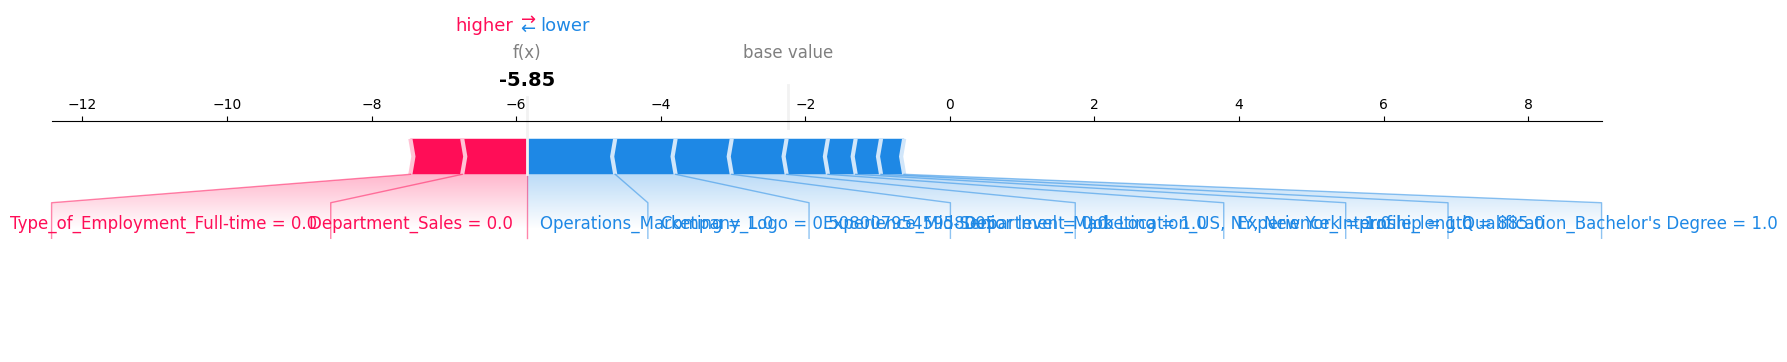

In [631]:

row_idx = 0

# Convert only the single row to dense
X_sample_row = X_trained_transformed[row_idx].toarray().reshape(1, -1)  # now dense

# Get SHAP values for this row
shap_values_row = explainer.shap_values(X_sample_row)

# Top 20 features
top_idx = np.argsort(np.abs(shap_values_row[0]))[::-1][:10]
X_sample_row_small = X_sample_row[:, top_idx]
shap_values_row_small = shap_values_row[:, top_idx]
feature_names_small = np.array(feature_names)[top_idx]

import shap
shap.initjs()

# Force plot with only top features
shap.force_plot(
    explainer.expected_value,
    shap_values_row_small[0],
    X_sample_row_small,
    feature_names=feature_names_small,
    matplotlib=True
)




The value of -5.85 is very strong against the positive class. It represents a very strong negative prediction on the log-odds scale.

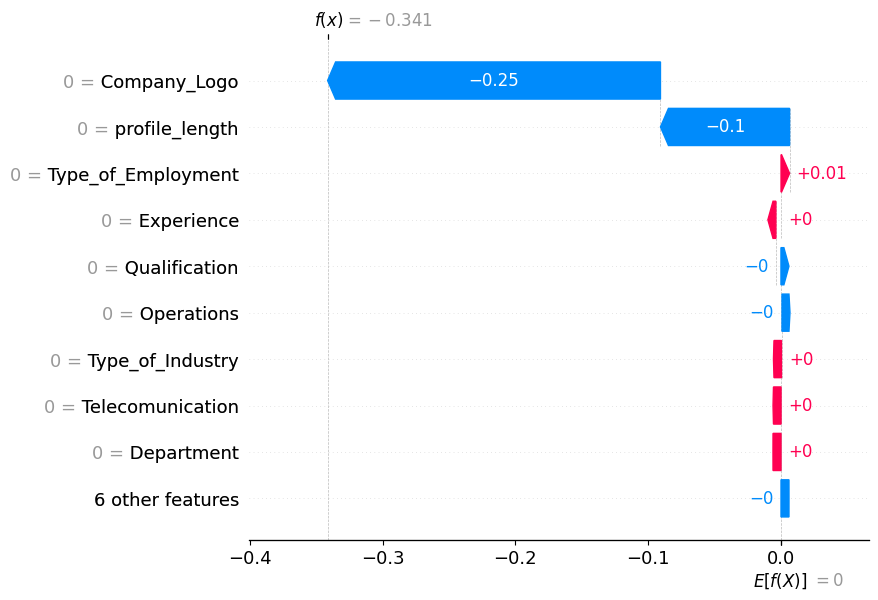

In [632]:
expl = shap.Explanation(
    values=mean_shap_agg["mean_shap"].values,  # SHAP values
    base_values=0,                                   # baseline = 0 for global importance
    data=np.zeros_like(mean_shap_agg["mean_shap"].values),  # dummy feature values
    feature_names=mean_shap_agg["feature"].values
)

shap.initjs()
shap.waterfall_plot(expl)

The 'profile_length' feature has a negative shap value. This means it pushes the prediction down toward the negative(i.e not fraud) . Therefore a longer profile length is reducing the predicted fraud probability for this case.The 'profile_length' feature is the second most important predictor according to mean SHAP values, indicating model heavily relies on it.For this specific observation, the negative SHAP value suggests that the profile length contributes to lowering fraud probability, consistent with the expectation that longer profiles are less likely to be fraudulent.

# Conclusion

The objective of this analysis was to identify patterns that distinguish fraudulent from  legitimate job postings and to build a model to predict fraud risk. The hypothesis is that thhe profile length can be an indicator of fraudulent jod posting.SMOTE was applied to the imbalanced dataset for more accurate evaluation of model and improvement of predictive power  of model. Threshold tuning was applied after SMOTE using the expected cost framework. I found that the most cost effecitve probabiltiy threshold is 0.68. The model at this threshold under cross validation evaluation achieved a precisison score of 32.44% , recall score of 69.4% and ROC_AUC score of 80.93%. The recall score is considered to be the most important evaluation metric since the objective is to detect fraud job postings.This means that only 69.4% of fraud postings will be detected. A better model , such as tree based model may need to be implemented for more accurate prediction and analysis of problem.The global feature importance from  the logistic regression model suggests that the profile length has the least impact on prediction.However, the  SHAP analysis and interpretation of the dataset suggests that the hypothesis has bearing. According to SHAP analysis, suggests that longer profiles are less likely to be fraudulent.

## Recommendations

1. To improve results and evaluation, a tree based model or deep learning model must be used for the problem. 

## Future Work
1. Use tree based model approach on problem.
2. Use deep learning model to investigate text ambiguity on the profile for fraud posting
3. Work on the diabetes dataset by using different classification models and GridSearch to get the most accurate reslts from each of the models. 